# Powergrid library construction and zero gamma data

$\Gamma = 0$,

Perburbations = large

Splitting time-series according to perturbation points

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import coo_array

from os import path

## Loading data

#### Reading gamma values 

In [6]:
folder_name = "powergrid/Datasets/case4bus2gen/"

In [7]:
gamma_df = pd.read_csv(path.join(folder_name, "case_4bus2gen_gamma.csv"))

In [8]:
gamma_df

,gen_1,gen_2,term_1,term_2,load_1,load_2
0,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000
5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000


#### Reading time series data and skipping rows to sub sample

In [9]:
# #Trimming original time series to reduce the number of data points
# data_matrix_df_orig = pd.read_csv(path.join(folder_name, "case_4bus2gen_timeseries.csv"))
# skip_n_rows_btw = 100
# rows_to_keep = np.arange(0, len(data_matrix_df_orig), skip_n_rows_btw)

# data_matrix_df = data_matrix_df_orig.iloc[rows_to_keep].reset_index(drop=True)

# data_matrix_df.to_csv(path.join(folder_name, "trimmed_time_series.csv"), index=False)

In [12]:
data_matrix_df = pd.read_csv(path.join(folder_name, "trimmed_time_series.csv"))

In [14]:
data_matrix_df

,time,PhaseGen1,PhaseGen2,PhaseGenTerm1,PhaseGenTerm2,PhaseLoad1,PhaseLoad2,FreqGen1,FreqGen2,FreqGenTerm1,...,ActivePowerGenTerm1,ActivePowerGenTerm2,ActivePowerLoad1,ActivePowerLoad2,ReactivePowerGen1,ReactivePowerGen2,ReactivePowerGenTerm1,ReactivePowerGenTerm2,ReactivePowerLoad1,ReactivePowerLoad2
0,0.00000000,0.00000000,0.03048064,0.00000000,0.03048064,0.00000000,0.00000000,0.00000000,0.00000000,-3.76991118,...,-0.00000000,1.30553432,-0.82715001,-0.47838430,0.00000000,0.00000000,0.68226515,1.40126166,-1.07708835,-1.28431796
1,0.01000000,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,...,0.25887909,-0.09266137,-0.97515765,-1.22561386,0.01685263,0.05413882,0.70721622,1.45846000,-1.07791568,-1.27233265
2,0.02000000,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,...,0.00431959,-0.27718714,-1.30142939,-1.56906862,0.05116939,0.11723936,0.74514915,1.54140061,-1.06778242,-1.25900967
3,0.03000000,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,...,-0.15474827,-0.38378622,-1.49777509,-1.77850225,0.08184660,0.16651783,0.77837431,1.60565779,-1.06013534,-1.24913009
4,0.04000000,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,...,-0.25006607,-0.44760550,-1.61575711,-1.90489358,0.10459105,0.19957296,0.80290385,1.64850497,-1.05507883,-1.24260948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,-1.95655998,-1.95669805,-2.13053526,-2.10006318,-2.14920717,-2.16678274,0.00363872,-0.00221294,0.00069589,...,-0.29729650,-0.48939667,-1.69997886,-2.00001998,0.14105687,0.20602536,0.84402828,1.65508171,-1.05350374,-1.23940161
19997,199.96010000,-1.95652469,-1.95671968,-2.13052857,-2.10007093,-2.14920882,-2.16678136,0.00340700,-0.00210454,0.00064024,...,-0.29725612,-0.48942949,-1.69997735,-2.00001657,0.14110313,0.20598557,0.84408266,1.65502423,-1.05350881,-1.23940611
19998,199.97010000,-1.95649205,-1.95674001,-2.13052249,-2.10007838,-2.14921057,-2.16678024,0.00311030,-0.00195496,0.00057273,...,-0.29721652,-0.48946224,-1.69997636,-2.00001290,0.14114610,0.20594862,0.84413324,1.65497072,-1.05351355,-1.23941034
19999,199.98010000,-1.95646267,-1.95675865,-2.13051715,-2.10008538,-2.14921238,-2.16677942,0.00275684,-0.00176860,0.00049516,...,-0.29717850,-0.48949421,-1.69997590,-2.00000908,0.14118499,0.20591521,0.84417906,1.65492219,-1.05351785,-1.23941422


In [15]:
new_column_names = ["time", "Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
                   "om_0", "om_1", "om_2", "om_3","om_4", "om_5", "P_0", "P_1", "P_2", "P_3", "P_4", "P_5",
                   "Q_0", "Q_1", "Q_2", "Q_3", "Q_4", "Q_5"]
data_matrix_df.rename(columns=dict((zip(data_matrix_df.columns, new_column_names))),
                     inplace=True)

In [16]:
data_matrix_df = data_matrix_df[["time", "Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
                  "om_0", "om_1", "om_2", "om_3","om_4", "om_5", "P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]]

data_matrix_df

,time,Phi_0,Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,om_0,om_1,om_2,om_3,om_4,om_5,P_0,P_1,P_2,P_3,P_4,P_5
0,0.00000000,0.00000000,0.03048064,0.00000000,0.03048064,0.00000000,0.00000000,0.00000000,0.00000000,-3.76991118,-15.87535473,-6.58113387,-11.47271205,-0.00000000,-0.00000000,-0.00000000,1.30553432,-0.82715001,-0.47838430
1,0.01000000,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,-4.13083405,-5.46518256,-5.83873397,0.56095147,1.47360231,0.25887909,-0.09266137,-0.97515765,-1.22561386
2,0.02000000,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,-2.17392585,-3.00515162,-3.24914607,0.97655598,2.16680957,0.00431959,-0.27718714,-1.30142939,-1.56906862
3,0.03000000,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,-1.03243119,-1.52473992,-1.67005372,1.23405535,2.58075647,-0.15474827,-0.38378622,-1.49777509,-1.77850225
4,0.04000000,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,-0.35264904,-0.63517643,-0.71708550,1.39417084,2.82415143,-0.25006607,-0.44760550,-1.61575711,-1.90489358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,199.95010000,-1.95655998,-1.95669805,-2.13053526,-2.10006318,-2.14920717,-2.16678274,0.00363872,-0.00221294,0.00069589,-0.00078551,-0.00015942,0.00015066,1.61748155,2.86921045,-0.29729650,-0.48939667,-1.69997886,-2.00001998
19997,199.96010000,-1.95652469,-1.95671968,-2.13052857,-2.10007093,-2.14920882,-2.16678136,0.00340700,-0.00210454,0.00064024,-0.00076292,-0.00017081,0.00012491,1.61774472,2.86893481,-0.29725612,-0.48942949,-1.69997735,-2.00001657
19998,199.97010000,-1.95649205,-1.95674001,-2.13052249,-2.10007838,-2.14921057,-2.16678024,0.00311030,-0.00195496,0.00057273,-0.00072490,-0.00017825,0.00009728,1.61798918,2.86867884,-0.29721652,-0.48946224,-1.69997636,-2.00001290
19999,199.98010000,-1.95646267,-1.95675865,-2.13051715,-2.10008538,-2.14921238,-2.16677942,0.00275684,-0.00176860,0.00049516,-0.00067272,-0.00018170,0.00006843,1.61821035,2.86844733,-0.29717850,-0.48949421,-1.69997590,-2.00000908


In [17]:
data_matrix_df.columns

Index(['time', 'Phi_0', 'Phi_1', 'Phi_2', 'Phi_3', 'Phi_4', 'Phi_5', 'om_0',
       'om_1', 'om_2', 'om_3', 'om_4', 'om_5', 'P_0', 'P_1', 'P_2', 'P_3',
       'P_4', 'P_5'],
      dtype='object')

In [18]:
final_time = 50

In [19]:
data_matrix_df[data_matrix_df["time"] <= final_time]

,time,Phi_0,Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,om_0,om_1,om_2,om_3,om_4,om_5,P_0,P_1,P_2,P_3,P_4,P_5
0,0.00000000,0.00000000,0.03048064,0.00000000,0.03048064,0.00000000,0.00000000,0.00000000,0.00000000,-3.76991118,-15.87535473,-6.58113387,-11.47271205,-0.00000000,-0.00000000,-0.00000000,1.30553432,-0.82715001,-0.47838430
1,0.01000000,0.00207317,0.03228481,-0.05799463,-0.04116035,-0.06907518,-0.08088508,0.38409320,0.32207273,-5.19153263,-4.13083405,-5.46518256,-5.83873397,0.56095147,1.47360231,0.25887909,-0.09266137,-0.97515765,-1.22561386
2,0.02000000,0.00714632,0.03639922,-0.09755353,-0.07170918,-0.11038467,-0.12525976,0.60913700,0.48141153,-2.87931824,-2.17392585,-3.00515162,-3.24914607,0.97655598,2.16680957,0.00431959,-0.27718714,-1.30142939,-1.56906862
3,0.03000000,0.01391813,0.04161200,-0.11853445,-0.08725512,-0.13241283,-0.14920139,0.73206815,0.54963974,-1.43655444,-1.03243119,-1.52473992,-1.67005372,1.23405535,2.58075647,-0.15474827,-0.38378622,-1.49777509,-1.77850225
4,0.04000000,0.02158021,0.04721482,-0.12817977,-0.09388366,-0.14283237,-0.16073258,0.79225983,0.56424640,-0.56651413,-0.35264904,-0.63517643,-0.71708550,1.39417084,2.82415143,-0.25006607,-0.44760550,-1.61575711,-1.90489358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,49.95760000,-0.98267053,-0.92258628,-1.12635116,-1.08070183,-1.13627057,-1.15700205,0.12008899,-0.03946686,0.03460441,0.00230097,0.01684577,0.02153178,1.33797422,3.16206721,-0.33683769,-0.45811376,-1.70223424,-2.00285574
4997,49.96760000,-0.98109228,-0.92321312,-1.12593293,-1.08076191,-1.13611963,-1.15677156,0.19461432,-0.08544324,0.04881869,-0.01421204,0.01330662,0.02446809,1.34870116,3.15082692,-0.33737800,-0.45714005,-1.70176485,-2.00324518
4998,49.97760000,-0.97879950,-0.92428451,-1.12537971,-1.08098343,-1.13600505,-1.15651474,0.26276891,-0.12823232,0.06155838,-0.02993609,0.00958360,0.02678861,1.36478376,3.13397028,-0.33705126,-0.45687877,-1.70127106,-2.00355295
4999,49.98760000,-0.97586232,-0.92576443,-1.12470746,-1.08135698,-1.13592831,-1.15623797,0.32330417,-0.16702426,0.07258937,-0.04456839,0.00575312,0.02845408,1.38571743,3.11202237,-0.33588968,-0.45731325,-1.70076303,-2.00377384


### Splitting the time-series with respect to the perturbation points

In [20]:
#Getting perturbations time points
perturbation_points_df = pd.read_csv(path.join(folder_name, "case_4bus2gen_timepoints.csv"))

perturbation_points_df = perturbation_points_df[perturbation_points_df["Perturbation timepoints"] < final_time]

In [22]:
perturbation_time_point_list = perturbation_points_df["Perturbation timepoints"]
# perturbation_time_point_list

In [23]:
#Splitting the data_matrix with the timeseries into a list of timeseries dataframes based on where the perturbation is introduced
#The purpose of this step is to smoothen each of perturbation segment independently using splines and find the derivaties
#This will avoid jumps in the derivative due to the discontinuity at the perturbanc time point

data_matrix_df_list =[data_matrix_df[(ind_i < data_matrix_df["time"]) & (data_matrix_df["time"] < ind_j) ] 
                       for ind_i, ind_j in zip(perturbation_time_point_list[:-1], perturbation_time_point_list[1:])]


#### Loading admittance matrix, Y

In [24]:
admittance_Y_df = pd.read_csv("powergrid/Datasets/case_4bus2gen_largeperturb/case_4bus2gen_Y.csv")
for column in admittance_Y_df.columns:
    admittance_Y_df[column] = admittance_Y_df[column].apply(lambda x: x.replace('i', 'j'))

In [11]:
admittance_Y_df

,gen_1,gen_2,term_1,term_2,load_1,load_2
0,0-9.3443j,0,-0+9.3443j,0,0,0
1,0,0-19.302j,0,-0+19.302j,0,0
2,-0+9.3443j,0,0-55.977j,0,0+19.841j,0+26.882j
3,0,-0+19.302j,0,0-61.805j,0+26.882j,0+15.723j
4,0,0,0+19.841j,0+26.882j,0-46.633j,0
5,0,0,0+26.882j,0+15.723j,0,0-42.502j


#### Loading static parameters

In [26]:
static_param_df = pd.read_csv("powergrid/Datasets/case_4bus2gen_largeperturb/case_4bus2gen_staticparams.csv")

In [27]:
static_param_df

,V,A,omega_R,D,H
0,1.00000000,1.82000000,376.99111843,50,7.28000000
1,1.02000000,3.18000000,376.99111843,50,12.72000000
2,1.00000000,-0.50000000,376.99111843,50,0.00000000
3,1.02000000,-0.80000000,376.99111843,50,0.00000000
4,0.98985198,-1.70000000,376.99111843,50,0.00000000
5,0.97876194,-2.00000000,376.99111843,50,0.00000000


#### Loading coupling matrix, K

In [14]:
coupling_K_df = pd.read_csv("powergrid/Datasets/case_4bus2gen_largeperturb/case_4bus2gen_K.csv")

In [15]:
coupling_K_df_labeled = coupling_K_df.set_index(coupling_K_df.columns)
coupling_K_df_labeled

,gen_1,gen_2,term_1,term_2,load_1,load_2
gen_1,0.00000000,0.00000000,10.51600000,0.00000000,0.00000000,0.00000000
gen_2,0.00000000,0.00000000,0.00000000,22.25500000,0.00000000,0.00000000
term_1,10.51600000,0.00000000,0.00000000,0.00000000,19.64000000,26.31100000
term_2,0.00000000,22.25500000,0.00000000,0.00000000,27.14100000,15.69700000
load_1,0.00000000,0.00000000,19.64000000,27.14100000,0.00000000,0.00000000
load_2,0.00000000,0.00000000,26.31100000,15.69700000,0.00000000,0.00000000


## Forming candidate library for powersystems

In [16]:
gamma_df

,gen_1,gen_2,term_1,term_2,load_1,load_2
0,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000
5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000


In [17]:
gamma_matrix = gamma_df.to_numpy()
admittance_Y_matrix = admittance_Y_df.to_numpy()

gamma_matrix

array([[-3.1416,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    , -3.1416,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -3.1416,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , -3.1416,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -3.1416,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -3.1416]])

In [18]:
coupling_matrix_init = np.ones(admittance_Y_matrix.shape)
# coupling_matrix_init = np.zeros(admittance_Y_matrix.shape)
# coupling_matrix_init[3,:] = 1

coupling_matrix_init = np.triu(coupling_matrix_init, 0)
coupling_matrix_init
sparse_coupling_matrix_init = coo_array(coupling_matrix_init)
sparse_coupling_matrix_init.toarray()

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

### Defining the sin interaction terms 

In [20]:
from dae_finder import FeatureCouplingTransformer

def coup_fun_sin_diff(x,y,i,j,gam_matrix):
    return np.sin(x-y- gam_matrix[i,j])

def coup_namer_sin_diff(x,y,i,j,gam_matrix):
    return "sin( {}-{} -gamma_{},{} )".format(x,y,i,j)


def coup_fun_diff(x,y,i,j,gam_matrix):
    return x-y- gam_matrix[i,j]

def coup_namer_diff(x,y,i,j,gam_matrix):
    return "{}-{} -gamma_{},{}".format(x,y,i,j)

transfomrer_sin_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
                                           coupling_func= coup_fun_sin_diff,
                                           coupling_namer= coup_namer_sin_diff,
                                           coupling_func_args={"gam_matrix":gamma_matrix},
                                              return_df=True)

transformer_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
                                           coupling_func= coup_fun_diff,
                                           coupling_namer= coup_namer_diff,
                                           coupling_func_args={"gam_matrix":gamma_matrix},
                                              return_df=True)

In [21]:
#Creating library with sin(load angle difference)
sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))
cop_ind = dummy_tr_sin_diff.coupled_indices_list

#Creating library with load angle difference
diff_library = transformer_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))


In [22]:
sin_diff_library

,"sin( Phi_0-Phi_0 -gamma_0,0 )","sin( Phi_0-Phi_1 -gamma_0,1 )","sin( Phi_0-Phi_2 -gamma_0,2 )","sin( Phi_0-Phi_3 -gamma_0,3 )","sin( Phi_0-Phi_4 -gamma_0,4 )","sin( Phi_0-Phi_5 -gamma_0,5 )","sin( Phi_1-Phi_1 -gamma_1,1 )","sin( Phi_1-Phi_2 -gamma_1,2 )","sin( Phi_1-Phi_3 -gamma_1,3 )","sin( Phi_1-Phi_4 -gamma_1,4 )",...,"sin( Phi_2-Phi_2 -gamma_2,2 )","sin( Phi_2-Phi_3 -gamma_2,3 )","sin( Phi_2-Phi_4 -gamma_2,4 )","sin( Phi_2-Phi_5 -gamma_2,5 )","sin( Phi_3-Phi_3 -gamma_3,3 )","sin( Phi_3-Phi_4 -gamma_3,4 )","sin( Phi_3-Phi_5 -gamma_3,5 )","sin( Phi_4-Phi_4 -gamma_4,4 )","sin( Phi_4-Phi_5 -gamma_4,5 )","sin( Phi_5-Phi_5 -gamma_5,5 )"
0,-0.00000735,-0.03047592,0.00000000,-0.03047592,0.00000000,0.00000000,-0.00000735,0.03047592,0.00000000,0.03047592,...,-0.00000735,-0.03047592,0.00000000,0.00000000,-0.00000735,0.03047592,0.03047592,-0.00000735,0.00000000,-0.00000735
1,-0.00000735,-0.03047531,0.00450709,-0.01673703,0.00716010,0.01100489,-0.00000735,0.03497999,0.01374178,0.03763130,...,-0.00000735,-0.02124332,0.00265305,0.00649796,-0.00000735,0.02389570,0.02773936,-0.00000735,0.00384494,-0.00000735
2,-0.00000735,-0.03047158,0.01010039,-0.00608268,0.01493577,0.02114777,-0.00000735,0.04056572,0.02439116,0.04539701,...,-0.00000735,-0.01618257,0.00483574,0.01104856,-0.00000735,0.02101749,0.02722870,-0.00000735,0.00621298,-0.00000735
3,-0.00000735,-0.03046276,0.01631235,0.00265901,0.02282945,0.03055608,-0.00000735,0.04676349,0.03312043,0.05327368,...,-0.00000735,-0.01365364,0.00651831,0.01424728,-0.00000735,0.02017105,0.02789821,-0.00000735,0.00772933,-0.00000735
4,-0.00000735,-0.03044773,0.02281530,0.01016169,0.03059503,0.03934598,-0.00000735,0.05324453,0.04060314,0.06101433,...,-0.00000735,-0.01265508,0.00778245,0.01653811,-0.00000735,0.02043652,0.02919013,-0.00000735,0.00875623,-0.00000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.00000735,0.04679143,0.19606528,0.17794249,0.22114180,0.23574775,-0.00000735,0.14996727,0.13170290,0.17526663,...,-0.00000735,-0.01844747,0.02563860,0.04063305,-0.00000735,0.04407565,0.05905837,-0.00000735,0.01500226,-0.00000735
19996,-0.00000735,0.04620578,0.19577130,0.17750830,0.22077056,0.23540490,-0.00000735,0.15025053,0.13184671,0.17546907,...,-0.00000735,-0.01858888,0.02555776,0.04058010,-0.00000735,0.04413615,0.05914666,-0.00000735,0.01503014,-0.00000735
19997,-0.00000735,0.04561203,0.19547335,0.17706802,0.22039414,0.23505735,-0.00000735,0.15053778,0.13199244,0.17567429,...,-0.00000735,-0.01873240,0.02547568,0.04052638,-0.00000735,0.04419753,0.05923628,-0.00000735,0.01505848,-0.00000735
19998,-0.00000735,0.04501032,0.19517149,0.17662176,0.22001264,0.23470518,-0.00000735,0.15082896,0.13214005,0.17588223,...,-0.00000735,-0.01887800,0.02539239,0.04047191,-0.00000735,0.04425978,0.05932723,-0.00000735,0.01508727,-0.00000735


In [24]:
diff_library

,"Phi_0-Phi_0 -gamma_0,0","Phi_0-Phi_1 -gamma_0,1","Phi_0-Phi_2 -gamma_0,2","Phi_0-Phi_3 -gamma_0,3","Phi_0-Phi_4 -gamma_0,4","Phi_0-Phi_5 -gamma_0,5","Phi_1-Phi_1 -gamma_1,1","Phi_1-Phi_2 -gamma_1,2","Phi_1-Phi_3 -gamma_1,3","Phi_1-Phi_4 -gamma_1,4",...,"Phi_2-Phi_2 -gamma_2,2","Phi_2-Phi_3 -gamma_2,3","Phi_2-Phi_4 -gamma_2,4","Phi_2-Phi_5 -gamma_2,5","Phi_3-Phi_3 -gamma_3,3","Phi_3-Phi_4 -gamma_3,4","Phi_3-Phi_5 -gamma_3,5","Phi_4-Phi_4 -gamma_4,4","Phi_4-Phi_5 -gamma_4,5","Phi_5-Phi_5 -gamma_5,5"
0,3.14160000,-0.03048064,0.00000000,-0.03048064,0.00000000,0.00000000,3.14160000,0.03048064,0.00000000,0.03048064,...,3.14160000,-0.03048064,0.00000000,0.00000000,3.14160000,0.03048064,0.03048064,3.14160000,0.00000000,3.14160000
1,3.14160000,-0.03048003,0.00450710,-0.01673781,0.00716016,0.01100511,3.14160000,0.03498713,0.01374222,0.03764019,...,3.14160000,-0.02124492,0.00265305,0.00649801,3.14160000,0.02389797,0.02774292,3.14160000,0.00384495,3.14160000
2,3.14160000,-0.03047629,0.01010056,-0.00608271,0.01493632,0.02114935,3.14160000,0.04057686,0.02439358,0.04541262,...,3.14160000,-0.01618328,0.00483576,0.01104878,3.14160000,0.02101904,0.02723206,3.14160000,0.00621302,3.14160000
3,3.14160000,-0.03046748,0.01631308,0.00265901,0.02283143,0.03056084,3.14160000,0.04678055,0.03312649,0.05329891,...,3.14160000,-0.01365407,0.00651836,0.01424776,3.14160000,0.02017242,0.02790183,3.14160000,0.00772941,3.14160000
4,3.14160000,-0.03045244,0.02281728,0.01016186,0.03059980,0.03935614,3.14160000,0.05326972,0.04061430,0.06105225,...,3.14160000,-0.01265542,0.00778252,0.01653886,3.14160000,0.02043794,0.02919428,3.14160000,0.00875634,3.14160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.14160000,0.04680852,0.19734369,0.17889518,0.22298511,0.23798793,3.14160000,0.15053517,0.13208665,0.17617658,...,3.14160000,-0.01844852,0.02564141,0.04064424,3.14160000,0.04408993,0.05909276,3.14160000,0.01500283,3.14160000
19996,3.14160000,0.04622224,0.19704391,0.17845396,0.22260445,0.23763516,3.14160000,0.15082167,0.13223172,0.17638221,...,3.14160000,-0.01858995,0.02556054,0.04059125,3.14160000,0.04415049,0.05918120,3.14160000,0.01503071,3.14160000
19997,3.14160000,0.04562786,0.19674009,0.17800659,0.22221852,0.23727757,3.14160000,0.15111223,0.13237874,0.17659067,...,3.14160000,-0.01873349,0.02547844,0.04053748,3.14160000,0.04421193,0.05927098,3.14160000,0.01505905,3.14160000
19998,3.14160000,0.04502553,0.19643230,0.17755319,0.22182743,0.23691527,3.14160000,0.15140678,0.13252766,0.17680190,...,3.14160000,-0.01887912,0.02539512,0.04048296,3.14160000,0.04427424,0.05936208,3.14160000,0.01508784,3.14160000


In [25]:
candidate_lib = pd.concat([data_matrix_df.drop("time", axis=1), sin_diff_library, diff_library], axis=1)

In [26]:
candidate_lib

,Phi_0,Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,om_0,om_1,P_0,P_1,...,"Phi_2-Phi_2 -gamma_2,2","Phi_2-Phi_3 -gamma_2,3","Phi_2-Phi_4 -gamma_2,4","Phi_2-Phi_5 -gamma_2,5","Phi_3-Phi_3 -gamma_3,3","Phi_3-Phi_4 -gamma_3,4","Phi_3-Phi_5 -gamma_3,5","Phi_4-Phi_4 -gamma_4,4","Phi_4-Phi_5 -gamma_4,5","Phi_5-Phi_5 -gamma_5,5"
0,0.00000000,0.03048064,0.00000000,0.03048064,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,...,3.14160000,-0.03048064,0.00000000,0.00000000,3.14160000,0.03048064,0.03048064,3.14160000,0.00000000,3.14160000
1,0.00002335,0.03050337,-0.00448376,0.01676116,-0.00713681,-0.01098176,0.04646118,0.04470565,0.04211540,0.27596292,...,3.14160000,-0.02124492,0.00265305,0.00649801,3.14160000,0.02389797,0.02774292,3.14160000,0.00384495,3.14160000
2,0.00009241,0.03056870,-0.01000816,0.00617512,-0.01484392,-0.02105694,0.09137797,0.08534748,0.09438068,0.48982403,...,3.14160000,-0.01618328,0.00483576,0.01104878,3.14160000,0.02101904,0.02723206,3.14160000,0.00621302,3.14160000
3,0.00020551,0.03067299,-0.01610756,-0.00245350,-0.02262592,-0.03035533,0.13452744,0.12274113,0.15242683,0.66512547,...,3.14160000,-0.01365407,0.00651836,0.01424776,3.14160000,0.02017242,0.02790183,3.14160000,0.00772941,3.14160000
4,0.00036083,0.03081327,-0.02245645,-0.00980103,-0.03023897,-0.03899531,0.17579489,0.15740460,0.21319206,0.81539350,...,3.14160000,-0.01265542,0.00778252,0.01653886,3.14160000,0.02043794,0.02919428,3.14160000,0.00875634,3.14160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.97391876,0.92711023,0.77657506,0.79502358,0.75093365,0.73593082,-0.37948524,0.20270163,1.83208456,2.64486175,...,3.14160000,-0.01844852,0.02564141,0.04064424,3.14160000,0.04408993,0.05909276,3.14160000,0.01500283,3.14160000
19996,0.97353681,0.92731457,0.77649290,0.79508285,0.75093236,0.73590165,-0.38439408,0.20596503,1.82933758,2.64774966,...,3.14160000,-0.01858995,0.02556054,0.04059125,3.14160000,0.04415049,0.05918120,3.14160000,0.01503071,3.14160000
19997,0.97315000,0.92752215,0.77640991,0.79514341,0.75093148,0.73587243,-0.38920564,0.20917433,1.82655343,2.65067619,...,3.14160000,-0.01873349,0.02547844,0.04053748,3.14160000,0.04421193,0.05927098,3.14160000,0.01505905,3.14160000
19998,0.97275843,0.92773290,0.77632613,0.79520524,0.75093100,0.73584316,-0.39391918,0.21232900,1.82373283,2.65364060,...,3.14160000,-0.01887912,0.02539512,0.04048296,3.14160000,0.04427424,0.05936208,3.14160000,0.01508784,3.14160000


### Removing zero features

In [27]:
non_zero_column_series = (candidate_lib**2).sum() > 0.00001
non_zero_column_series
non_columns = [column for column in candidate_lib if non_zero_column_series[column]]

candidate_lib = candidate_lib[non_columns]

## Smoothening data and finding derivatives using splines

In [31]:
from dae_finder import add_noise_to_df

noise_perc = 0
data_matrix_df_list = [data_matrix_df]
num_time_points = len(data_matrix_df)
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    t_exact = data_matrix_["time"]
    noisy_data_df = add_noise_to_df(data_matrix_, noise_perc=noise_perc, random_seed=111)
    noisy_data_df["time"] = t_exact
    data_matrix_df_list[ind] = noisy_data_df

In [32]:
from dae_finder import smooth_data

# Calling the smoothening function
data_matrix_smooth_df_list = [smooth_data(data_matrix, domain_var="time", derr_order=1, noise_perc=noise_perc) for
                              data_matrix in data_matrix_df_list]

if len(data_matrix_df_list) > 1:
    data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list, ignore_index=True)
else:
    data_matrix_df_smooth_appended = data_matrix_smooth_df_list[0]

data_matrix_df_smooth = data_matrix_df_smooth_appended[data_matrix_features]
# if "time" in data_matrix_df_smooth:
#     data_matrix_df_smooth = data_matrix_df_smooth.drop("time", axis=1)

In [33]:
data_matrix_df_smooth - data_matrix_df

,time,Phi_0,Phi_1,Phi_2,Phi_3,Phi_4,Phi_5,om_0,om_1,P_0,P_1,P_2,P_3,P_4,P_5
0,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000
1,-0.00000005,-0.00000000,-0.00000000,0.00000023,0.00000054,0.00000034,0.00000047,-0.00000206,-0.00000191,-0.00000216,-0.00001083,-0.00000640,0.00001724,-0.00000326,0.00000541
2,-0.00000009,-0.00000001,-0.00000001,0.00000053,0.00000085,0.00000070,0.00000087,-0.00000397,-0.00000350,-0.00000502,-0.00001723,-0.00000735,0.00002094,-0.00000060,0.00000927
3,-0.00000014,-0.00000002,-0.00000002,0.00000085,0.00000107,0.00000104,0.00000121,-0.00000570,-0.00000485,-0.00000808,-0.00002176,-0.00000532,0.00002021,0.00000319,0.00001175
4,-0.00000018,-0.00000003,-0.00000003,0.00000115,0.00000123,0.00000135,0.00000150,-0.00000726,-0.00000602,-0.00001105,-0.00002533,-0.00000203,0.00001804,0.00000693,0.00001344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.00000018,-0.00000007,0.00000004,-0.00000001,0.00000001,-0.00000000,-0.00000001,-0.00000089,0.00000059,-0.00000049,0.00000052,-0.00000004,0.00000002,-0.00000001,0.00000000
19996,0.00000014,-0.00000005,0.00000003,-0.00000001,0.00000001,-0.00000000,-0.00000000,-0.00000066,0.00000044,-0.00000037,0.00000039,-0.00000003,0.00000002,-0.00000001,0.00000000
19997,0.00000009,-0.00000004,0.00000002,-0.00000001,0.00000001,-0.00000000,-0.00000000,-0.00000043,0.00000029,-0.00000025,0.00000027,-0.00000002,0.00000001,-0.00000000,0.00000000
19998,0.00000005,-0.00000002,0.00000001,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000021,0.00000014,-0.00000013,0.00000013,-0.00000001,0.00000001,-0.00000000,0.00000000


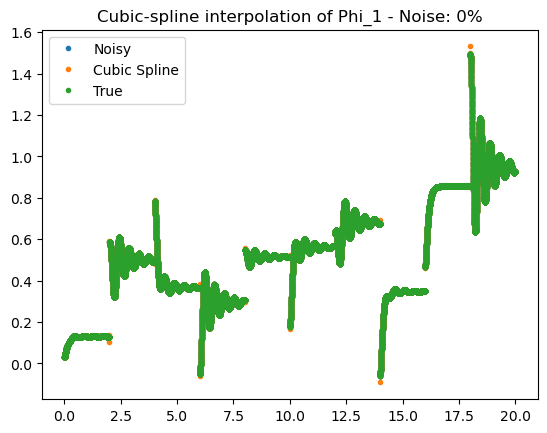

In [34]:
ind = 0
feature_ = "Phi_1"

plt.figure()
# plt.plot(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], "x", t_eval_new, x_new,
#         data_matrix_df[50:100]["t"], data_matrix_df[50:100]["x"], "o")

plt.plot(data_matrix_df_list[ind]["time"], data_matrix_df_list[ind][feature_], ".",
         data_matrix_smooth_df_list[ind]["time"],
         data_matrix_smooth_df_list[ind][feature_], ".",
         data_matrix_df[ind * num_time_points:(ind + 1) * num_time_points]["time"],
         data_matrix_df[ind * num_time_points:(ind + 1) * num_time_points][feature_], ".")
plt.legend(['Noisy', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation of {} - Noise: {}%'.format(feature_, noise_perc))
plt.show()

### Removing some of the outliers coming from sudden jump during perturbations


<Axes: >

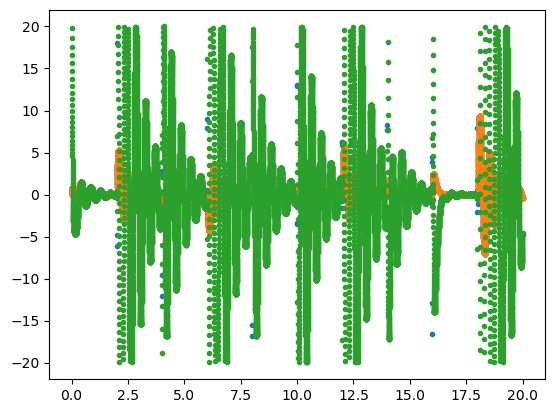

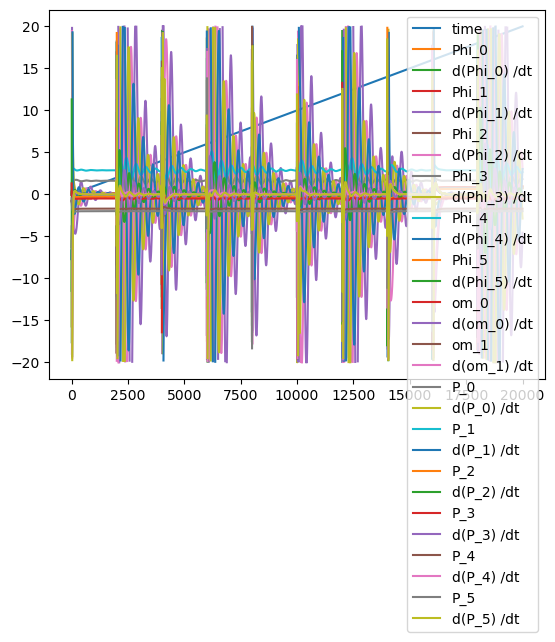

In [35]:
new_df = data_matrix_df_smooth_appended[abs(data_matrix_df_smooth_appended) <= 20]

plt.plot(new_df[["time"]], new_df[["d(Phi_0) /dt"]], ".",
         new_df[["time"]], new_df[["om_0"]], ".",
         new_df[["time"]], new_df[["d(om_0) /dt"]], ".")

new_df.plot()

## Finding Algebraic relationship

### Using sympy to find factors of redundant feature and refine the library

In [36]:
import sympy

from dae_finder import get_refined_lib, remove_paranth_from_feat

# Adding the state variables as scipy symbols
feat_list = list(data_matrix_df.columns)
feat_list_str = ", ".join(remove_paranth_from_feat(data_matrix_df.columns))
exec(feat_list_str+ "= sympy.symbols("+str(feat_list)+")")

In [37]:
refined_candid_lib = data_matrix_df_smooth_appended[['Phi_0', 'Phi_1', 'Phi_2', 'Phi_3', 'Phi_4', 'Phi_5', 'om_0',
                                                     'om_1', 'P_0', 'P_1', 'P_2', 'P_3', 'P_4', 'P_5']]

In [38]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler(with_std=True, with_mean=False)
scaled_refined_lib = pd.DataFrame(s_scaler.fit_transform(refined_candid_lib), columns=s_scaler.feature_names_in_)
scaled_cand_lib = pd.DataFrame(s_scaler.fit_transform(candidate_lib), columns=s_scaler.feature_names_in_)

# Using Lasso

## Finding the conservation laws

In [40]:
from dae_finder import sequentialThLin, AlgModelFinder
algebraic_model_lasso = AlgModelFinder(model_id='lasso',
                                       alpha=0.3,
                                       fit_intercept=True)

In [41]:
features_to_fit_ = ["Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
                    "P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# features_to_fit_ = ["P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
num_nodes = 6
power_features = ["P_{}".format(ind) for ind in range(num_nodes)]
# Mapping each power feature to possible expressions in the algebraic relationship
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features) for power_feat in power_features}

algebraic_model_lasso.fit(candidate_lib, scale_columns=True,
                          features_to_fit=features_to_fit_,
                          feature_to_library_map=feature_to_libr_map)

AlgModelFinder(alpha=0.3, fit_intercept=True)

In [42]:
algebraic_model_lasso.best_models()

,P_1,P_0,Phi_5,Phi_3,Phi_2,Phi_4,Phi_1,Phi_0,P_4,P_5,P_3,P_2
Phi_0,-0.00000000,0.00000000,0.00000000,0.00000000,0.00665259,0.00000000,0.00000000,NaN,-0.00000000,0.00000000,0.00000000,-0.00000000
Phi_1,0.00000000,-0.00000000,0.00000000,0.24189243,0.00000000,0.00000000,NaN,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000
Phi_2,-0.00000000,0.00000000,0.41556021,0.09646602,NaN,0.00666101,0.00000000,0.69211189,-0.00000000,-0.00000000,0.00000000,0.00000000
Phi_3,0.00000000,-0.00000000,0.08898220,NaN,0.00000000,0.26353228,0.70255944,0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000
Phi_4,0.00000000,-0.00000000,0.19151630,0.07122496,0.00000000,NaN,0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000
Phi_5,-0.00000000,-0.00000000,NaN,0.28731937,0.68956403,0.42733485,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000
om_0,0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000
om_1,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000
"sin( Phi_0-Phi_1 -gamma_0,1 )",-0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000
"sin( Phi_0-Phi_2 -gamma_0,2 )",-0.00000000,6.54098071,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000


In [49]:
feat = "P_5"
algebraic_model_lasso.best_models()[feat][abs(algebraic_model_lasso.best_models()[feat])>0.1]

Phi_2-Phi_5 -gamma_2,5   -12.99667990
Phi_3-Phi_5 -gamma_3,5    -6.97549064
r2- metric                 0.79872567
Name: P_5, dtype: float64

## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

In [64]:
from sklearn.linear_model import Lasso

alg_lasso = Lasso(fit_intercept=True, alpha=0.3)
alg_lasso.fit(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.993372962219676

In [66]:
coef_dict = dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))
coef_dict

{'Phi_0': -0.0,
 'Phi_1': 0.0,
 'Phi_2': -0.0,
 'Phi_3': -0.0,
 'Phi_4': -0.0,
 'Phi_5': -0.0,
 'om_0': -4.378569736500431,
 'om_1': 0.0,
 'P_0': -21.257906402869075,
 'P_1': 0.0,
 'P_2': -0.6586577243676952,
 'P_3': -0.0,
 'P_4': 0.0,
 'P_5': 0.0}

In [67]:
seq_th_model.intercept_

43.934898759814715

In [68]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

['om_0', 'P_0', 'P_2']

In [69]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.9941958733407162

In [70]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

{'om_0': -4.794440359929478,
 'P_0': -21.691899870238316,
 'P_2': -1.032076931283162}

### Full candidate library is unable to find the model 

In [42]:
alg_lasso.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.9942246455235572

In [43]:
dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))

{'Phi_0': -0.0,
 'Phi_1': 0.0,
 'Phi_2': -0.0,
 'Phi_3': -0.0,
 'Phi_4': -0.0,
 'Phi_5': -0.0,
 'om_0': -4.42511229895725,
 'om_1': 0.0,
 'P_0': -16.11820529841526,
 'P_1': 0.0,
 'P_2': 0.0,
 'P_3': -0.0,
 'P_4': 0.0,
 'P_5': -0.0,
 'sin( Phi_0-Phi_1 -gamma_0,1 )': -0.0,
 'sin( Phi_0-Phi_2 -gamma_0,2 )': -0.07085153655901995,
 'sin( Phi_0-Phi_3 -gamma_0,3 )': -0.0,
 'sin( Phi_0-Phi_4 -gamma_0,4 )': -1.8898225265120703,
 'sin( Phi_0-Phi_5 -gamma_0,5 )': -3.234378209313293,
 'sin( Phi_1-Phi_2 -gamma_1,2 )': 0.0,
 'sin( Phi_1-Phi_3 -gamma_1,3 )': 0.0,
 'sin( Phi_1-Phi_4 -gamma_1,4 )': 0.0,
 'sin( Phi_1-Phi_5 -gamma_1,5 )': 0.0,
 'sin( Phi_2-Phi_3 -gamma_2,3 )': -0.0,
 'sin( Phi_2-Phi_4 -gamma_2,4 )': -0.0,
 'sin( Phi_2-Phi_5 -gamma_2,5 )': -0.0,
 'sin( Phi_3-Phi_4 -gamma_3,4 )': 0.0,
 'sin( Phi_3-Phi_5 -gamma_3,5 )': 0.0,
 'sin( Phi_4-Phi_5 -gamma_4,5 )': 0.0}

# Using Sequential Thresholding

## Finding the conservation laws

In [50]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)
seq_th_model = sequentialThLin(coef_threshold=0.1, fit_intercept=True)

algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

In [51]:
algebraic_model_th.fit(candidate_lib, scale_columns=True,
                       features_to_fit=features_to_fit_,
                       feature_to_library_map=feature_to_libr_map)


Sequential threshold converged in 1 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations


AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x33a579c10>)

In [52]:
#Best 10 models using R2 metrix
algebraic_model_th.best_models()

,P_0,P_1,P_4,P_5,P_3,P_2,Phi_2,Phi_3,Phi_5,Phi_4,Phi_1,Phi_0
Phi_0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.18179678,-0.13908034,0.00000000,0.00000000,0.00000000,NaN
Phi_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.27415651,0.37681997,0.00000000,0.40885248,NaN,0.19216789
Phi_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,NaN,0.73290445,0.53949336,0.54940474,-1.11029393,2.64700002
Phi_3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.72142625,NaN,0.20268308,-0.32131166,1.52043686,-1.99332490
Phi_4,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.25290179,-0.16221304,0.25488732,NaN,0.58659892,-0.38476701
Phi_5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.11627801,0.19240419,NaN,0.36441666,0.00000000,0.53935512
om_0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
om_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_0-Phi_1 -gamma_0,1 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_0-Phi_2 -gamma_0,2 )",9.34379096,0.00000000,0.00000000,0.00000000,0.00000000,-9.34297629,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [53]:
algebraic_model_th.get_fitted_intercepts()

{'Phi_0': 0.21267267646124108,
 'Phi_1': 0.1391496812135795,
 'Phi_2': 0.0035993399844938467,
 'Phi_3': -0.00720855746618487,
 'Phi_4': -0.06658016589706343,
 'Phi_5': -0.036798693639325766,
 'P_0': 8.012605982551605e-05,
 'P_1': 0.0001432537724328918,
 'P_2': -0.00012499810839002403,
 'P_3': -0.00012416838330224158,
 'P_4': -8.885831618496361e-05,
 'P_5': -0.00011506684743742915}

In [60]:
feat = "P_5"
algebraic_model_th.best_models()[feat][abs(algebraic_model_th.best_models()[feat]) > 0.1]

sin( Phi_2-Phi_5 -gamma_2,5 )   -26.30931850
sin( Phi_3-Phi_5 -gamma_3,5 )   -15.69620700
r2- metric                        1.00000000
Name: P_5, dtype: float64

## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

In [56]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)
seq_th_model = sequentialThLin(model_id="lasso", coef_threshold=0.1, fit_intercept=True)

seq_th_model.fit(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
seq_th_model.score(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

Sequential threshold converged in 1 iterations


0.9861173018370403

In [57]:
coef_dict = dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))
coef_dict

{'Phi_0': 0.0,
 'Phi_1': 0.0,
 'Phi_2': 0.0,
 'Phi_3': 0.0,
 'Phi_4': 0.0,
 'Phi_5': 0.0,
 'om_0': -3.4265790184989955,
 'om_1': 0.0,
 'P_0': -20.273842484145458,
 'P_1': 0.0,
 'P_2': 0.0,
 'P_3': 0.0,
 'P_4': 0.0,
 'P_5': 0.0}

In [58]:
seq_th_model.intercept_

43.67131166721149

In [59]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

['om_0', 'P_0']

In [60]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])

0.991855949164572

In [61]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

{'om_0': -4.706282780743189, 'P_0': -21.55353230528021}

### Full candidate library is unable to find the model 

In [62]:
seq_th_model.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
seq_th_model.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

Sequential threshold converged in 2 iterations


0.988885520759928

In [63]:
dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))

{'Phi_0': 0.0,
 'Phi_1': 0.0,
 'Phi_2': 0.0,
 'Phi_3': 0.0,
 'Phi_4': 0.0,
 'Phi_5': 0.0,
 'om_0': -3.513639923413333,
 'om_1': 0.0,
 'P_0': -16.19834499489593,
 'P_1': 0.0,
 'P_2': 0.0,
 'P_3': 0.0,
 'P_4': 0.0,
 'P_5': 0.0,
 'sin( Phi_0-Phi_1 -gamma_0,1 )': 0.0,
 'sin( Phi_0-Phi_2 -gamma_0,2 )': 0.0,
 'sin( Phi_0-Phi_3 -gamma_0,3 )': 0.0,
 'sin( Phi_0-Phi_4 -gamma_0,4 )': -1.3982756870160125,
 'sin( Phi_0-Phi_5 -gamma_0,5 )': -2.7962471849994524,
 'sin( Phi_1-Phi_2 -gamma_1,2 )': 0.0,
 'sin( Phi_1-Phi_3 -gamma_1,3 )': 0.0,
 'sin( Phi_1-Phi_4 -gamma_1,4 )': 0.0,
 'sin( Phi_1-Phi_5 -gamma_1,5 )': 0.0,
 'sin( Phi_2-Phi_3 -gamma_2,3 )': 0.0,
 'sin( Phi_2-Phi_4 -gamma_2,4 )': 0.0,
 'sin( Phi_2-Phi_5 -gamma_2,5 )': 0.0,
 'sin( Phi_3-Phi_4 -gamma_3,4 )': 0.0,
 'sin( Phi_3-Phi_5 -gamma_3,5 )': 0.0,
 'sin( Phi_4-Phi_5 -gamma_4,5 )': 0.0}